# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [ ]:
Salary_Info = pd.read_csv("Position_Salaries.csv")
Salary_Info.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
Position_Level = Salary_Info['Level'].values
Level_Salary = Salary_Info['Salary'].values
print(Position_Level); print(Level_Salary)

[ 1  2  3  4  5  6  7  8  9 10]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


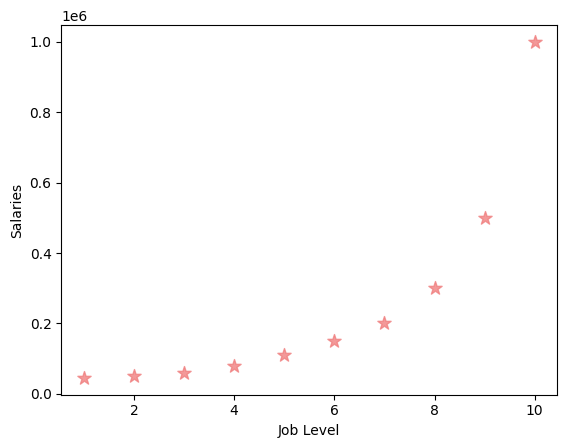

In [ ]:
plt.scatter(Position_Level, Level_Salary, color = 'Lightcoral', marker = '*', s = 100, alpha = 0.8)
plt.xlabel('Job Level')
plt.ylabel('Salaries')
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> As we can observe from the plot presented above, it's evident that the data points deviate noticeably from a linear pattern. This implies that a simple linear regression model may not be suitable because the regression line is likely to be distant from the data points.
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> No, as we have observed above, the regression line will be distant from the data points making the simple linear model unsuitable.
* Explain why you said yes or no to the above questions.
> Given the plot, it's apparent the data doesn't follow a linear pattern, suggesting a simple linear regression model will not be appropriate.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

In [ ]:
w = 1000
b = 2000
c = 1000
x = Position_Level
y = Level_Salary
N = x.size

In [ ]:
w_values = np.linspace(1000, 15000, 1000)
c_values = np.linspace(1000, 15000, 1000)

In [ ]:
MSE = np.empty((len(w_values), len(c_values)))
for i in range(len(w_values)):
    for j in range(len(c_values)):
        MSE[i, j] = 1/N * np.sum((((c_values[j] * x * x) + (w_values[i] * x) + b) - y) ** 2)

In [ ]:
min_indices = np.unravel_index(np.argmin(MSE), MSE.shape)
optimal_w = w_values[min_indices[0]]
optimal_c = c_values[min_indices[1]]
x1 = x[0]
y1 = y[0]
optimal_b = y1 - optimal_c * x1 * x1 - optimal_w * x1

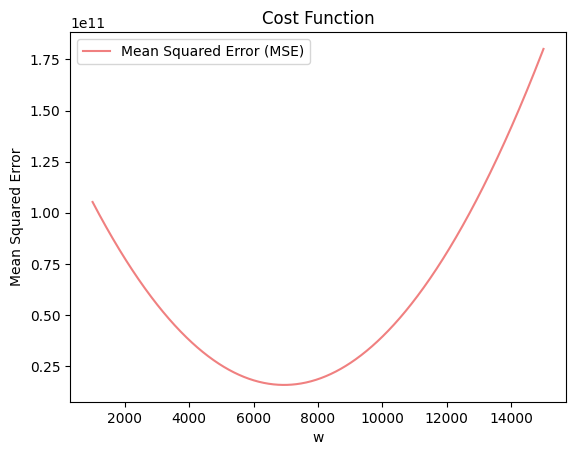

In [ ]:
plt.plot(w_values, MSE[min_indices[0], :], label = 'Mean Squared Error (MSE)', color = 'Lightcoral')
plt.xlabel('w')
plt.ylabel('Mean Squared Error')
plt.title('Cost Function')
plt.legend()
plt.show()


* Can you use mean squared error as the cost function (Yes/No)?
> Yes, we can use mean squared error as the cost function as it provides us with a measure of how incorrect the model is by calculating the average squared differences between the predicted values & actual values.
* Explain why you said yes or no to the above questions.
> As explained above, MSE makes a suitable choice for evaluating the performance of regression models, including polynomial regression.



**Derivatives of cost function:**
1. Derivative with respect to 𝑤 :

$$ \frac{\partial \text{MSE}}{\partial w} = \frac{2}{N} \sum_{i=0}^{N} (x_i(cx_i^2 + wx_i + b - y_i)) $$

2. Derivative with respect to 𝑐 :

$$ \frac{\partial \text{MSE}}{\partial c} = \frac{2}{N} \sum_{i=0}^{N} (x_i^2(cx_i^2 + wx_i + b - y_i)) $$

3. Derivative with respect to 𝑏 :

$$ \frac{\partial \text{MSE}}{\partial b} = \frac{2}{N} \sum_{i=0}^{N} (cx_i^2 + wx_i + b - y_i) $$


**Gradient Descent Algorithm:**
```
Repeat until converges:
```
1. Gradient Descent Algorithm for 𝑤 :

$$ w = w - \alpha \frac{d}{dw} \text{MSE}(w) $$

2. Gradient Descent Algorithm for 𝑐 :

$$ c = c - \alpha \frac{d}{dc} \text{MSE}(w) $$

3. Gradient Descent Algorithm for 𝑏 :

$$ b = b - \alpha \frac{d}{db} \text{MSE}(w) $$

## Implementation of the model

In [ ]:
def polynomial_prediction(w, b, c, x):
    return c * x**2 + w * x + b

def cost_function(x, y, w, c, b):
    N = x.size
    return np.mean((polynomial_prediction(w, b, c, x) - y)**2)

In [ ]:
def calculate_gradients(x, y, w, c, b):
    N = x.size
    residuals = polynomial_prediction(w, b, c, x) - y
    dMSE_dw = (2/N) * np.sum(residuals * x)
    dMSE_dc = (2/N) * np.sum(residuals * x**2)
    dMSE_db = (2/N) * np.sum(residuals)
    return dMSE_dw, dMSE_dc, dMSE_db

In [ ]:
def gradient_descent(x, y, w_initial, c_initial, b_initial, learning_rate, iterations):
    w, c, b = w_initial, c_initial, b_initial
    cost_history = []
    for _ in range(iterations):
        dMSE_dw, dMSE_dc, dMSE_db = calculate_gradients(x, y, w, c, b)
        w -= learning_rate * dMSE_dw
        c -= learning_rate * dMSE_dc
        b -= learning_rate * dMSE_db
        cost_history.append(cost_function(x, y, w, c, b))
    return w, c, b, cost_history

In [ ]:
w_initial = 1
c_initial = 1
b_initial = 2
learning_rate = 0.00001
iterations = 20000

In [ ]:
w_optimal, c_optimal, b_optimal, cost_history = gradient_descent(x, y, w_initial, c_initial, b_initial, learning_rate, iterations)

In [ ]:
print('Optimal parameters after', iterations, 'iterations:', w_optimal, b_optimal, c_optimal)

Optimal parameters after 20000 iterations: -26267.66479223093 -3490.5230026650006 10281.871788599687


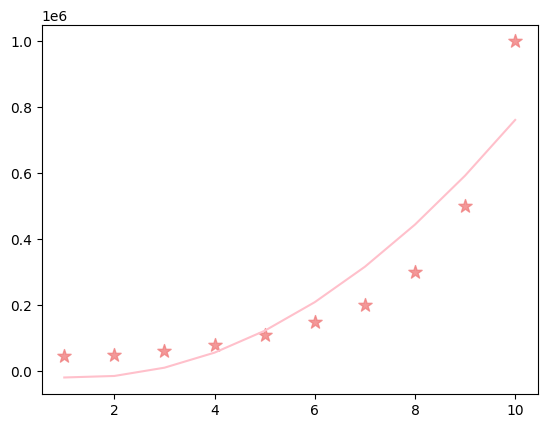

In [ ]:
plt.scatter(x, y, color = 'Lightcoral', label = 'Data', marker = '*', s = 100, alpha = 0.8)
plt.plot(x, polynomial_prediction(w_optimal, b_optimal, c_optimal, x), label = 'Predicted', color = 'Pink')

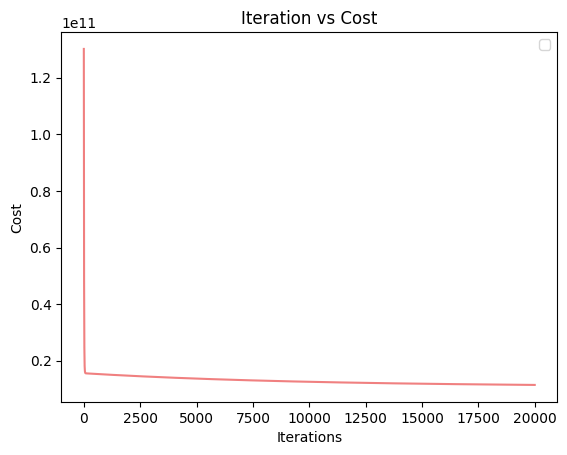

In [ ]:
plt.figure()
plt.plot(range(iterations), cost_history, color = 'Lightcoral')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Iteration vs Cost')
plt.legend()
plt.show()

In [ ]:
levels_to_predict = np.array([7, 8])
predicted_salaries = polynomial_prediction(w_optimal, b_optimal, c_optimal, levels_to_predict)
print("Predicted salaries for levels 7 and 8:")
for salary in predicted_salaries:
    print(round(salary))

Predicted salaries for levels 7 and 8:
316448
444408


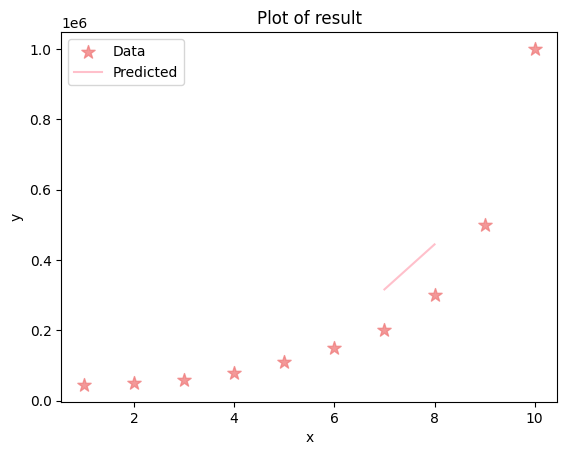

In [ ]:
plt.scatter(x, y, color = 'Lightcoral', label = 'Data', marker = '*', s = 100, alpha = 0.8)
plt.plot(levels_to_predict, predicted_salaries, label = 'Predicted', color = 'Pink')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of result')
plt.legend()
plt.show()

In [ ]:
y_pred = polynomial_prediction(w_optimal, b_optimal, c_optimal, x)
SST = np.sum((y - np.mean(y)) ** 2)
SSE = np.sum((y - y_pred) ** 2)
r2 = 1 - (SSE / SST)
print("Calculated R-squared:", r2)

Calculated R-squared: 0.8577475766510733


### Answer the following

* What is learning rate?
> The learning rate, a hyperparameter in machine learning algorithms, determines the magnitude of steps taken during optimization, especially in gradient-based methods like gradient descent.

* What will happen if the learning rate is too large?
> When the learning rate is excessively high, the optimization may overshoot the minimum of the loss function, leading to divergence where the loss increases instead of decreasing over time.

* What will happen if the learning rate is too small?
> With a learning rate of 0.00001, which we have obtained from the model, the optimization process progresses gradually but steadily towards the minimum point. However, this may result in slow convergence, extending the training duration and potentially leading to inefficiency in finding the optimal solution.

* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> *   Adjust the cost function calculation to handle the third-order model.
> *   Assess the model complexity and potential overfitting with the addition of higher-order terms.
> *   Update the gradient calculation function to account for the third-order terms.
> *   Perform validation and evaluation of the third-order model to ensure its effectiveness.
> *   Investigate alternative regression algorithms or ensemble methods that may better handle the nonlinear relationships captured by higher-order polynomial models.